# Imputation

In [167]:
# repalce missing values 
# mean(average), 
# median(middle value) 
# and mode(highest frequency)
# Forward/Backward fill: time series data, use the nearest neighbour, forward or backward.

In [168]:
import pandas as pd
import numpy as np
import os

In [169]:
#setting path relatively. to ensure it works on windows/linux environments 
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [170]:
train_df = pd.read_csv(train_file_path,index_col = 'PassengerId')
test_df = pd.read_csv(test_file_path,index_col = 'PassengerId')

In [171]:
test_df['Survived'] = -1
#axis defines if you merge or append data. 0 appends data, 1 addds column
df = pd.concat((train_df,test_df),axis=0)

In [172]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [116]:
df[df.Survived.isnull()].Survived = -1
#extract null values from df
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [117]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [118]:
pd.crosstab(df[df.Survived != -1].Survived,df.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [119]:
df.loc[df.Embarked.isnull(),'Embarked'] = 'S'#df.loc needs rows,columns as input
df.Embarked.fillna('S',inplace=True)

In [120]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [121]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

In [122]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [123]:
## categorical Feature encoding

In [124]:
df['isMale'] = np.where(df.Sex == 'male',1,0) 

### Feature Engineering

In [125]:
df['AgeState'] = np.where(df['Age']>18,'Adult','Child')

In [126]:
df['AgeState'].value_counts()

Adult    853
Child    456
Name: AgeState, dtype: int64

In [127]:
pd.crosstab(df[df['Survived']!=-1].Survived,df[df['Survived']!=-1].AgeState) 
#crosstabs for counting certain categories.

AgeState,Adult,Child
Survived,,
0,355,194
1,220,122


In [128]:
## Feature: Family size

In [129]:
df['FamilySize'] = df.Parch + df.SibSp + 1 #1 for self

In [130]:
%matplotlib inline

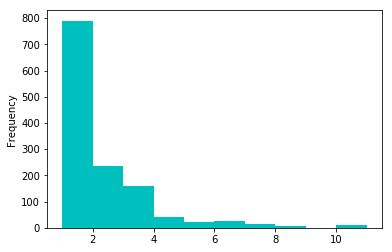

In [131]:
df['FamilySize'].plot(kind='hist',color='c')

In [132]:
df.loc[df.FamilySize==df.FamilySize.max(),['Name','Survived','Ticket','FamilySize']]

,Name,Survived,Ticket,FamilySize
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,CA. 2343,11
181,"Sage, Miss. Constance Gladys",0,CA. 2343,11
202,"Sage, Mr. Frederick",0,CA. 2343,11
325,"Sage, Mr. George John Jr",0,CA. 2343,11
793,"Sage, Miss. Stella Anna",0,CA. 2343,11
847,"Sage, Mr. Douglas Bullen",0,CA. 2343,11
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,CA. 2343,11
1080,"Sage, Miss. Ada",-1,CA. 2343,11
1234,"Sage, Mr. John George",-1,CA. 2343,11


In [133]:
pd.crosstab(df[df.Survived !=-1].Survived, df[df.Survived !=-1].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [134]:
## Feature: IsMother

In [135]:
df['IsMother'] = np.where((((df.Sex == 'female')& (df.Parch >1))& (df.Age>18)),1,0)

In [136]:
pd.crosstab(df[df.Survived !=-1].Survived,df[df.Survived !=-1].IsMother)

IsMother,0,1
Survived,,
0,539,10
1,321,21


In [137]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck (x))

In [138]:
df.Deck.value_counts()

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [139]:
pd.crosstab(df[df.Survived!=-1].Survived, df[df.Survived!=-1].Deck)

Deck,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


### Get dummie method 
for one hot encoding, this method automatically creates columns for categorical variables. Also, it replaces the existing column. see the example below:

In [140]:
df = pd.get_dummies(df,columns=['Deck','Pclass','Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 28 columns):
Age           1046 non-null float64
Cabin         295 non-null object
Fare          1308 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
AgeState      1309 non-null object
FamilySize    1309 non-null int64
isMale        1309 non-null int32
IsMother      1309 non-null int32
Deck_A        1309 non-null uint8
Deck_B        1309 non-null uint8
Deck_C        1309 non-null uint8
Deck_D        1309 non-null uint8
Deck_E        1309 non-null uint8
Deck_F        1309 non-null uint8
Deck_G        1309 non-null uint8
Deck_T        1309 non-null uint8
Deck_Z        1309 non-null uint8
Pclass_1      1309 non-null uint8
Pclass_2      1309 non-null uint8
Pclass_3      1309 non-null uint8
Embarked_C    1309 non-null uint8
E

# Correlation Plots

##matshow is fastest. Seaborn plots are nicer but slower to generate

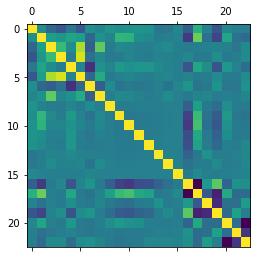

In [141]:
import matplotlib.pyplot as plt
plt.matshow(df[df.Survived!=-1].corr())

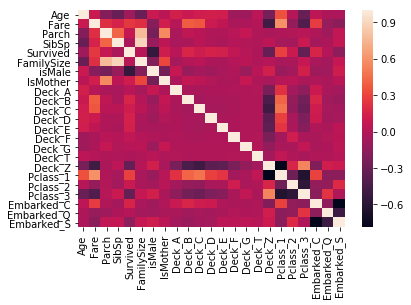

In [142]:
import seaborn as sns
corr = df[df.Survived!=-1].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### scatter_matrix gets progressively slower for dataframes with more columns

In [143]:
#pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Drop/Rearrange columns

In [144]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace=True)

In [145]:
c = [a for a in df.columns if a != 'Survived' ]
c = ['Survived']+c
df = df[c]

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 22 columns):
Survived      1309 non-null int64
Age           1046 non-null float64
Fare          1308 non-null float64
AgeState      1309 non-null object
FamilySize    1309 non-null int64
isMale        1309 non-null int32
IsMother      1309 non-null int32
Deck_A        1309 non-null uint8
Deck_B        1309 non-null uint8
Deck_C        1309 non-null uint8
Deck_D        1309 non-null uint8
Deck_E        1309 non-null uint8
Deck_F        1309 non-null uint8
Deck_G        1309 non-null uint8
Deck_T        1309 non-null uint8
Deck_Z        1309 non-null uint8
Pclass_1      1309 non-null uint8
Pclass_2      1309 non-null uint8
Pclass_3      1309 non-null uint8
Embarked_C    1309 non-null uint8
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
dtypes: float64(2), int32(2), int64(2), object(1), uint8(15)
memory usage: 130.8+ KB


## dynamic paths and writing to file

In [147]:
processed_data_path = os.path.join(os.path.pardir,'Data','Processed')
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')

In [148]:
print (processed_data_path)

..\Data\Processed


In [149]:
df[df.Survived!=-1].to_csv(write_train_path)
c = [a for a in df.columns if a != 'Survived']
df.loc[df.Survived ==-1,c].to_csv(write_test_path)

## Scripting

##### df.assign is used to assign new columns to a DataFrame.
##### df.pipe chains a function to a dataframe.http://jose-coto.com/pipes-with-pandas

In [150]:
get_proc_data_script = os.path.join(os.path.pardir,'src','data','get_proc_data.py')

###### magic functions like '%%writefile...' below, apply the settings only to the contents in the cell

In [151]:
%%writefile $get_proc_data_script
import numpy as np, pandas as pd, os

def read_data():
    #setting path relatively. to ensure it works on windows/linux environments 
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path,'train.csv')
    test_file_path = os.path.join(raw_data_path,'test.csv')
    train_df = pd.read_csv(train_file_path,index_col = 'PassengerId')
    test_df = pd.read_csv(test_file_path,index_col = 'PassengerId')
    test_df['Survived'] = -1
    df = pd.concat((train_df,test_df),axis=0)
    return df

def process_data(df):
    # using the method chaining concept
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         # reorder columns
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    # train data
    df[df.Survived != -1].to_csv(write_train_path) 
    # test data
    columns = [column for column in df.columns if column != 'Survived']
    df[df.Survived == -1][columns].to_csv(write_test_path) 

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)


Overwriting ..\src\data\get_proc_data.py


In [152]:
!python $get_proc_data_script

## Visualizations using matplotlib

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1309 non-null object
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 122.7+ KB


In [179]:
df.Age.fillna(df.Age.mean(), inplace=True)

TypeError: unsupported operand type(s) for +: 'float' and 'method'

TypeError: '>' not supported between instances of 'float' and 'method'

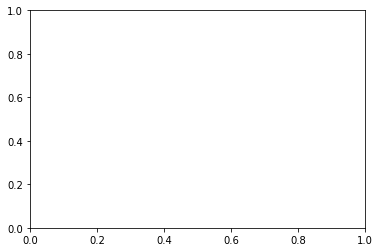

In [175]:
plt.hist(df.Age)